# Machine Learning Foundation

## Course 3, Part b: K-Nearest Neighbor LAB


## Introduction and Learning Goals

In this lab, we will explore classification using the K-Nearest Neighbors approach. So this original workbook from this lab downloaded the preprocessed .csv file, so I decided to work through the lab using a different dataset sourced from kaggle.


In [2]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import seaborn as sns

## Question 1

* We begin by importing the data. Examine the columns and data.
* Notice that the data contains a unique ID, an indicator for phone customer status, total lifetime value, total revenue, and a bank-estimated churn score. We will not be using these features, so they can be dropped from the data.
* Begin by taking an initial look at the data, including both numeric and non-numeric features.


In [5]:
df = pd.read_csv("../data/churndata_processed.csv")

In [6]:
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [7]:
df.columns

Index(['months', 'multiple', 'gb_mon', 'security', 'backup', 'protection',
       'support', 'unlimited', 'contract', 'paperless', 'monthly',
       'satisfaction', 'churn_value', 'payment_Credit Card',
       'payment_Mailed Check', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A',
       'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E'],
      dtype='object')

In [8]:
df.dtypes

months                       float64
multiple                       int64
gb_mon                       float64
security                       int64
backup                         int64
protection                     int64
support                        int64
unlimited                      int64
contract                     float64
paperless                      int64
monthly                      float64
satisfaction                 float64
churn_value                    int64
payment_Credit Card            int64
payment_Mailed Check           int64
internet_type_DSL              int64
internet_type_Fiber Optic      int64
internet_type_None             int64
offer_Offer A                  int64
offer_Offer B                  int64
offer_Offer C                  int64
offer_Offer D                  int64
offer_Offer E                  int64
dtype: object

In [9]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['months', 'multiple', 'gb_mon', 'security', 'backup', 'protection',
       'support', 'unlimited', 'contract', 'paperless', 'monthly',
       'satisfaction', 'churn_value', 'payment_credit card',
       'payment_mailed check', 'internet_type_dsl',
       'internet_type_fiber optic', 'internet_type_none', 'offer_offer a',
       'offer_offer b', 'offer_offer c', 'offer_offer d', 'offer_offer e'],
      dtype='object')

In [10]:
df.isna().sum()

months                       0
multiple                     0
gb_mon                       0
security                     0
backup                       0
protection                   0
support                      0
unlimited                    0
contract                     0
paperless                    0
monthly                      0
satisfaction                 0
churn_value                  0
payment_credit card          0
payment_mailed check         0
internet_type_dsl            0
internet_type_fiber optic    0
internet_type_none           0
offer_offer a                0
offer_offer b                0
offer_offer c                0
offer_offer d                0
offer_offer e                0
dtype: int64

No missing data. Good start. No I'm going to check if any object values are empty strings, as these will need to be removed.

In [11]:
df.eq(' ').sum()

months                       0
multiple                     0
gb_mon                       0
security                     0
backup                       0
protection                   0
support                      0
unlimited                    0
contract                     0
paperless                    0
monthly                      0
satisfaction                 0
churn_value                  0
payment_credit card          0
payment_mailed check         0
internet_type_dsl            0
internet_type_fiber optic    0
internet_type_none           0
offer_offer a                0
offer_offer b                0
offer_offer c                0
offer_offer d                0
offer_offer e                0
dtype: int64

Looks like there are some empty string values for total charges. There are only 11 so we can safely drop these columns.

In [13]:
df.eq(' ').sum()

months                       0
multiple                     0
gb_mon                       0
security                     0
backup                       0
protection                   0
support                      0
unlimited                    0
contract                     0
paperless                    0
monthly                      0
satisfaction                 0
churn_value                  0
payment_credit card          0
payment_mailed check         0
internet_type_dsl            0
internet_type_fiber optic    0
internet_type_none           0
offer_offer a                0
offer_offer b                0
offer_offer c                0
offer_offer d                0
offer_offer e                0
dtype: int64

Finally need to convert totalcharges to floats so we can continue with the preprocessing later.

In [15]:
df.describe()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_credit card,payment_mailed check,internet_type_dsl,internet_type_fiber optic,internet_type_none,offer_offer a,offer_offer b,offer_offer c,offer_offer d,offer_offer e
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.433551,0.421837,0.241358,0.286668,0.344881,0.343888,0.290217,0.673719,0.377396,0.592219,...,0.390317,0.054664,0.234559,0.430924,0.216669,0.073832,0.116996,0.058924,0.085475,0.114298
std,0.398231,0.493888,0.240223,0.452237,0.475363,0.475038,0.453895,0.468885,0.424234,0.491457,...,0.487856,0.227340,0.423753,0.495241,0.412004,0.261516,0.321438,0.235499,0.279607,0.318195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,1.000000,0.317647,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
Y_COLUMN = 'churn_value'

I'm also going to engineer the churn column to binary from object.

In [19]:
df[Y_COLUMN].unique()

array([1, 0])

## Question 2

* Identify which variables are binary, categorical and not ordinal, categorical and ordinal, and numeric.  The non-numeric features will need to be encoded using methods we have discussed in the course.
* Start by identifying the number of unique values each variable takes, then create list variables for categorical, numeric, binary, and ordinal variables. 
* Note that the variable 'months' can be treated as numeric, but it may be more convenient to transform it to an ordinal variable.
* For the other categorical variables, examine their values to determine which may be encoded ordinally.


### Binary Columns

There seem to be a number of columns whose values are recorded as objects, but could be Binary Encoded.

In [20]:
df_uniques = pd.DataFrame([[col, len(df[col].unique())] for col in df.columns], columns=['Variable', 'Count']).set_index('Variable')
df_uniques

,Count
Variable,
months,5
multiple,2
gb_mon,50
security,2
backup,2
protection,2
support,2
unlimited,2
contract,3


Based on the above breakdown, it looks like the categorical column value_counts sit between 3 and 4, and the rest are numerical which will need to be normalized via scaling.

### Binary Column Generation

I ran into some issues using the LabelBinarizer preprocessor class within pipelines, so I am just going to use numpy's map function to replace the 'yes' and 'no' to binary. Also, I am going to manually add gender to the categorical columns, as even though there are only two values it should really be treated as a categorical column.

In [21]:
binary_columns = [col for col in df.columns if len(df[col].unique()) == 2 and col != Y_COLUMN]
binary_columns

['multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'payment_credit card',
 'payment_mailed check',
 'internet_type_dsl',
 'internet_type_fiber optic',
 'internet_type_none',
 'offer_offer a',
 'offer_offer b',
 'offer_offer c',
 'offer_offer d',
 'offer_offer e']

In [22]:
df[binary_columns].value_counts()

multiple  security  backup  protection  support  unlimited  paperless  payment_credit card  payment_mailed check  internet_type_dsl  internet_type_fiber optic  internet_type_none  offer_offer a  offer_offer b  offer_offer c  offer_offer d  offer_offer e
0         0         0       0           0        0          0          1                    0                     0                  0                          1                   0              0              0              0              0                328
1         0         0       0           0        1          1          0                    0                     0                  1                          0                   0              0              0              0              0                137
0         0         0       0           0        1          1          0                    0                     0                  1                          0                   0              0              0             

In [23]:
df[binary_columns].dtypes

multiple                     int64
security                     int64
backup                       int64
protection                   int64
support                      int64
unlimited                    int64
paperless                    int64
payment_credit card          int64
payment_mailed check         int64
internet_type_dsl            int64
internet_type_fiber optic    int64
internet_type_none           int64
offer_offer a                int64
offer_offer b                int64
offer_offer c                int64
offer_offer d                int64
offer_offer e                int64
dtype: object

### Categorical Column Generation

In [27]:
categorical_columns = [col for col in df.columns if(len(df[col].unique()) > 2 and len(df[col].unique()) <= 5)]
categorical_columns

['months', 'contract', 'satisfaction']

In [28]:
df[categorical_columns]

,months,contract,satisfaction
0,0.00,0.0,0.50
1,0.00,0.0,0.50
2,0.25,0.0,0.25
3,0.25,0.0,0.25
4,0.50,0.0,0.25
...,...,...,...
7038,1.00,1.0,1.00
7039,0.25,0.5,0.50
7040,1.00,0.5,0.75
7041,0.00,0.0,0.75


### Numerical Column Generation

In [29]:
numerical_columns = [col for col in df.columns if col not in binary_columns and col not in categorical_columns and col != Y_COLUMN]
numerical_columns

['gb_mon', 'monthly']

In [30]:
assert len(binary_columns) + len(categorical_columns) + len(numerical_columns) + 1 == len(df.columns)

In [31]:
df[numerical_columns].dtypes

gb_mon     float64
monthly    float64
dtype: object

array([[<Axes: title={'center': 'gb_mon'}>,
        <Axes: title={'center': 'monthly'}>]], dtype=object)

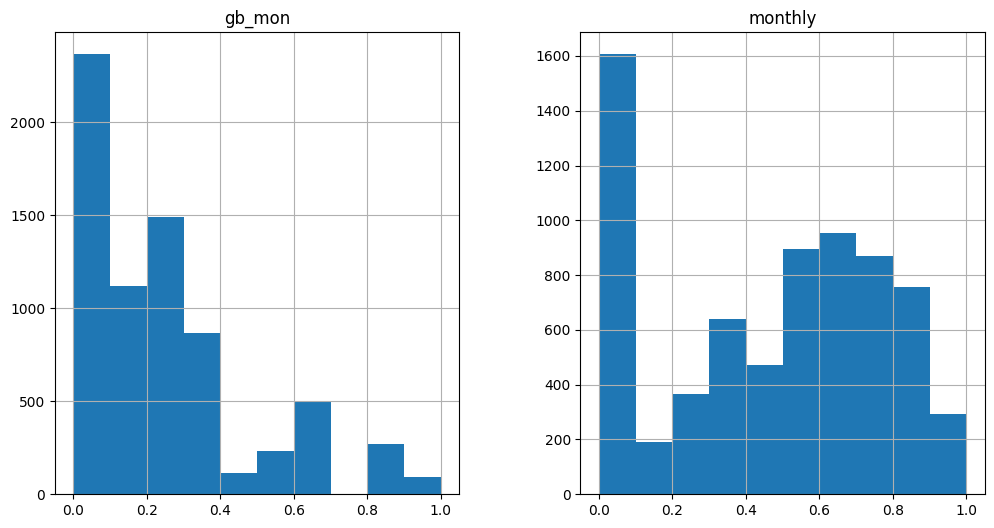

In [32]:
df[numerical_columns].hist(figsize=(12, 6))

These will need to be normalized within the column transformer.

## Question 3
* Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data. 
* Scale the data using one of the scaling methods discussed in the course.
* Save the processed dataframe as a comma-separated file: 'churndata_processed.csv'


In [33]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [34]:
categorical_transformer = Pipeline(
    steps=[
        ('cs', OneHotEncoder())
    ]
)

In [35]:
numerical_transformer = Pipeline(
    steps=[
        ('ss', StandardScaler())
    ]
)

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformer', categorical_transformer, categorical_columns),
        ('numerical_transformer', numerical_transformer, numerical_columns)
    ],
    remainder='passthrough'
)

## Question 4
* Now that the data are encoded and scaled, separate the features (X) from the target (y, churn_value). 
* Split the sample into training and test samples, with the test sample representing 40% of observations.
* Estimate a K-Nearest Neighbors model, using K=3.
* Examine the Precision, Recall, F-1 Score, and Accuracy of the classification.
* Use a graphic to illustrate the Confusion Matrix. 


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [38]:
y = df[Y_COLUMN]
X = df.drop(Y_COLUMN, axis=1)

In [39]:
y.value_counts(normalize=True)

churn_value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

As we can see, the distribution of y values is biased towards non-churned y_values, which will have an impact on the accuracy of our model.

In [40]:
from sklearn.feature_selection import SelectKBest, chi2

feature_selection = Pipeline(
    steps=[
        ('skb', SelectKBest(chi2, k = 10))
    ]
)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [42]:
model_1 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', KNeighborsClassifier(n_neighbors=3))
    ]
)

In [43]:
model_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical_transformer',
                                                  Pipeline(steps=[('cs',
                                                                   OneHotEncoder())]),
                                                  ['months', 'contract',
                                                   'satisfaction']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['gb_mon', 'monthly'])])),
                ('model', KNeighborsClassifier(n_neighbors=3))])

In [44]:
len(model_1['preprocessor'].get_feature_names_out())

32

In [45]:
model_1['model'].n_features_in_

32

In [46]:
y_pred = model_1.predict(X_test)

In [47]:
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2011
           1       0.90      0.82      0.86       807

    accuracy                           0.92      2818
   macro avg       0.91      0.89      0.90      2818
weighted avg       0.92      0.92      0.92      2818

Accuracy score:  0.92
F1 Score:  0.86


Text(0.5, 102.72222222222219, 'Ground Truth')

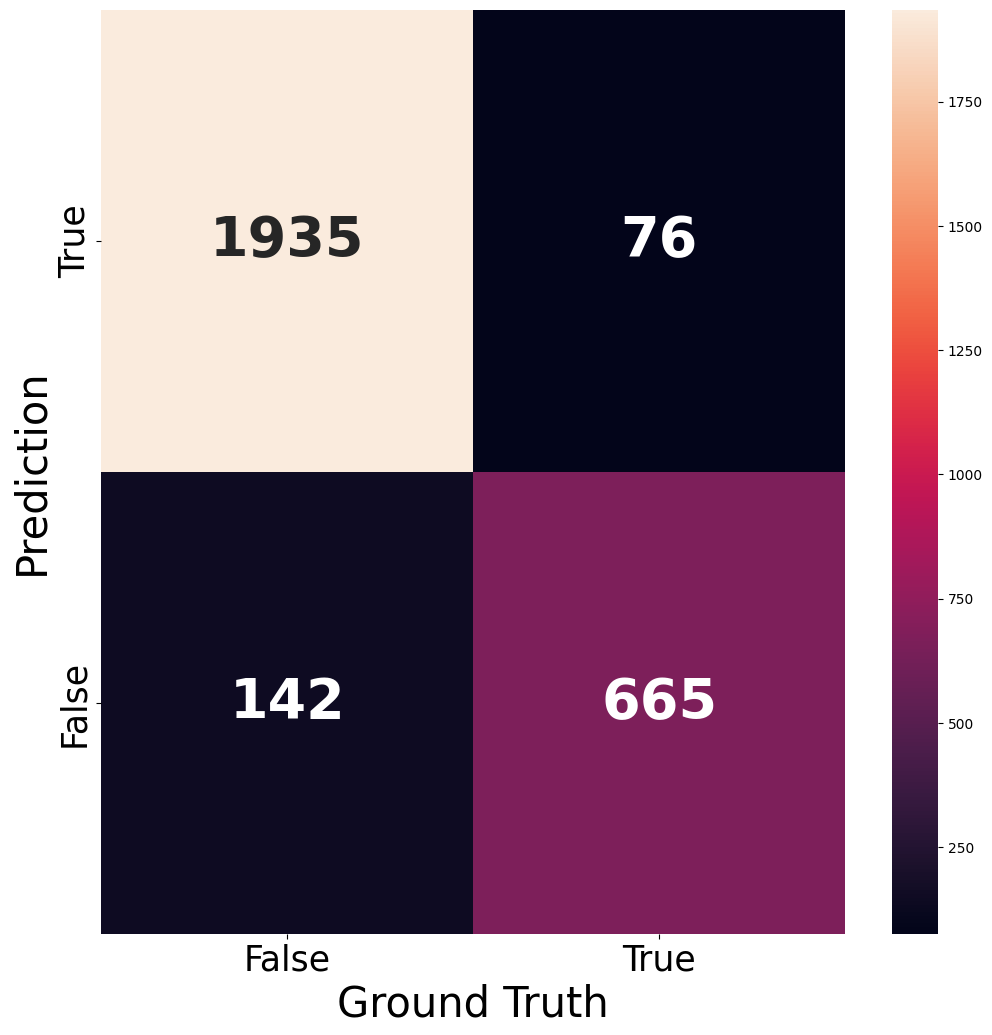

In [49]:
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                 annot=True,
                 fmt='d',
                 annot_kws={
                     'size': 40,
                     'weight': 'bold'
                 })
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)

## Question 6
* To determine the right value for K, examine results for values of K from 1 to 40.
* This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy).
* Generate charts which plot each of these measures as a function of K. 
* What do these charts suggest about the optimal value for K?


In [51]:
max_k = 40
f1_scores = list()
error_rates = list()

for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k,
                               weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, f1))
    error = 1 - round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))

In [52]:
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

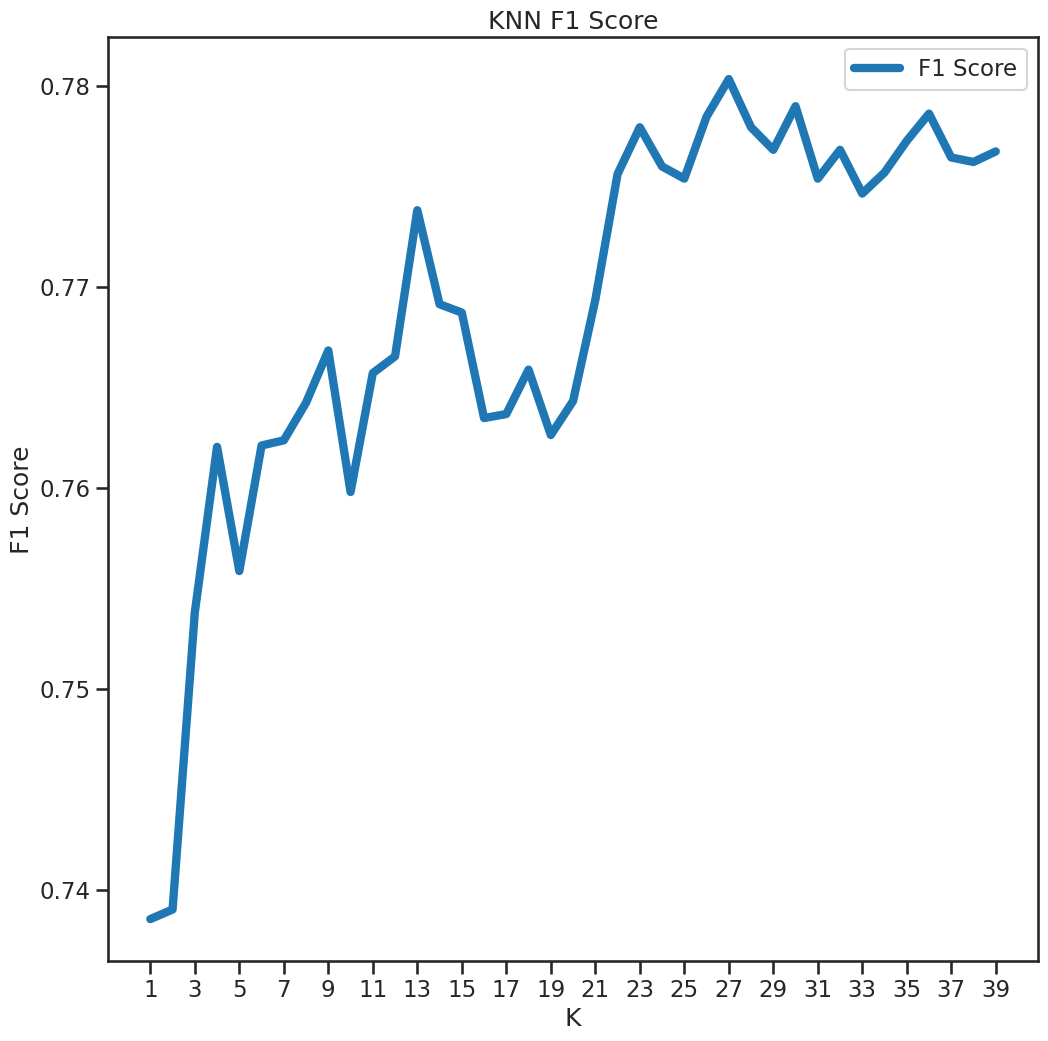

In [54]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1920x1440 with 0 Axes>

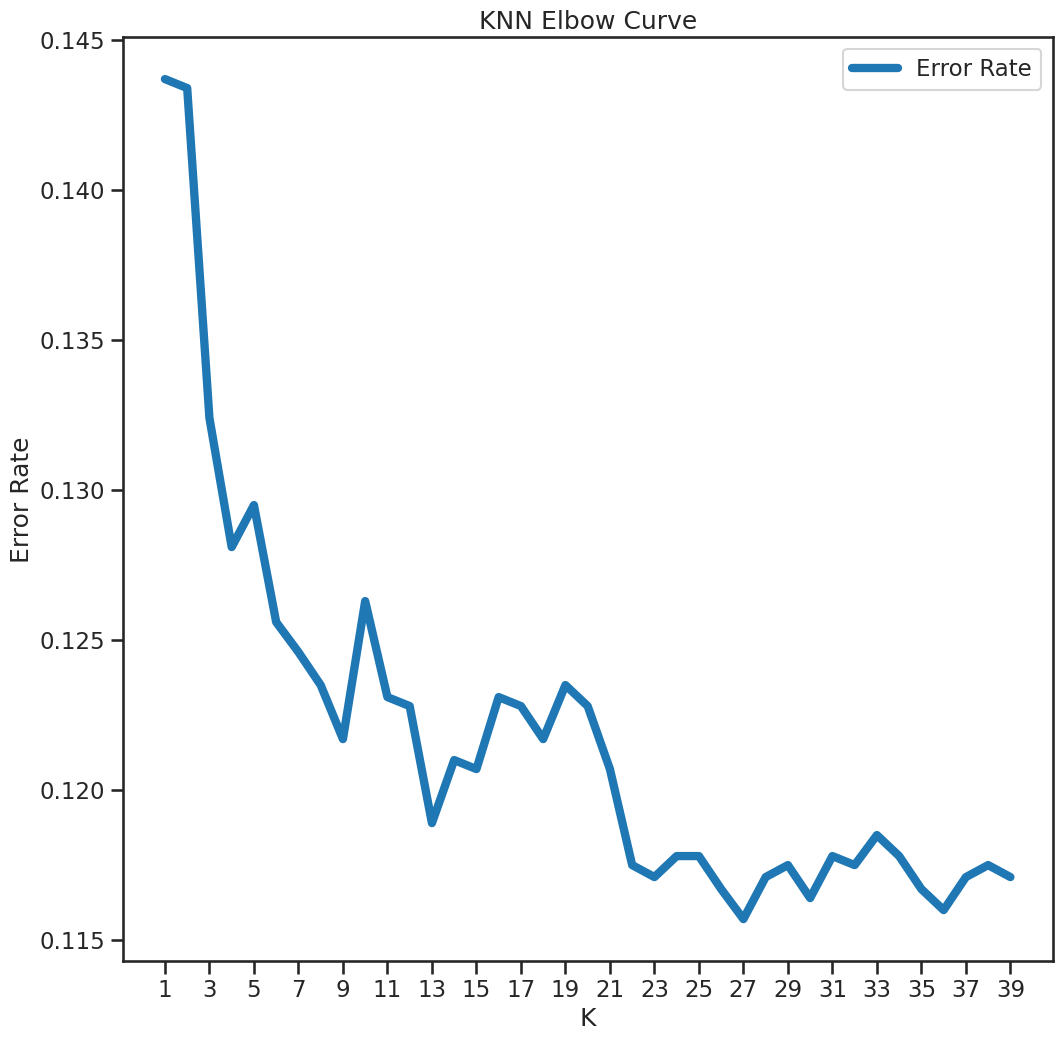

In [56]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')